# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [39]:
import pandas as pd
import numpy as nps
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# 2. Read the dataset

In [40]:
df = pd.read_csv("tweets.csv")
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      400 non-null    int64 
 1   author  400 non-null    object
 2   status  400 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


# 3. Split the dataset into X and y

In [42]:
X = df["status"]
y = df["author"]

# 4. Split the dataset into training set and testing set

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 5)


# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [45]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [46]:
# CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=0.05, max_df=0.9)
vectorizer_train = count_vectorizer.fit_transform(X_train)
vectorizer_test = count_vectorizer.transform(X_test)

# TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english', min_df=0.05, max_df=0.9)
tfidf_train = count_tfid.fit_transform(X_train)
tfidf_test = count_tfid.transform(X_test)


# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

logmodel_vect = LogisticRegression()
logmodel_tfidf = LogisticRegression()

In [49]:
logmodel_vect.fit(vectorizer_train,y_train)
# 

In [50]:

logmodel_tfidf.fit(tfidf_train,y_train)
# log_pred2 = logmodel.predict(tfidf_test)

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [52]:
from sklearn.svm import SVC

svm_vect = SVC()
svm_tfidf = SVC()

In [53]:
svm_vect.fit(vectorizer_train,y_train)

SVC()

In [54]:
svm_tfidf.fit(tfidf_train,y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [55]:
logmodel_predv = logmodel.predict(vectorizer_test)
print(accuracy_score(y_test, logmodel_predv))

0.7833333333333333


In [56]:
logmodel_predtf = logmodel.predict(tfidf_test)
print(accuracy_score(y_test, logmodel_predtf))

0.7666666666666667


In [57]:
svm_predv = svm_vect.predict(vectorizer_test)
print(accuracy_score(y_test, svm_predv))

0.8083333333333333


In [58]:
svm_predtf = svm_tfidf.predict(tfidf_test)
print(accuracy_score(y_test, svm_predtf))

0.8083333333333333


# 9. Plot a confusion matrix for both Logistic Regression and SVM

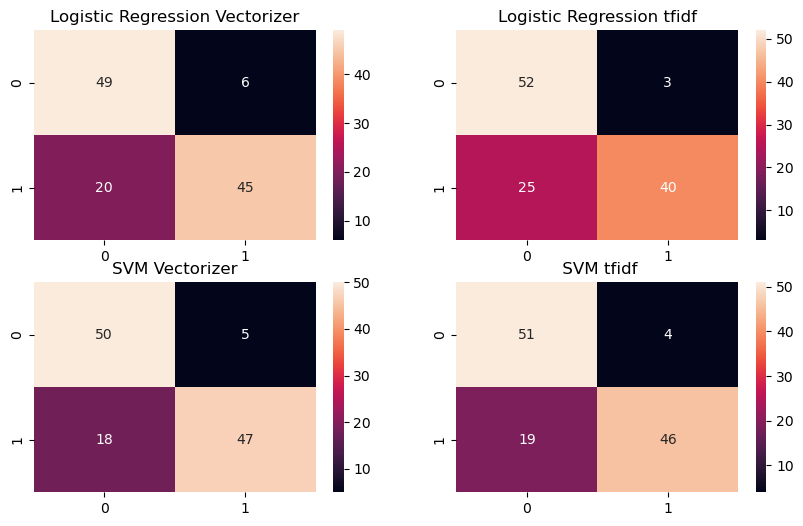

In [70]:
logv = confusion_matrix(y_test, logmodel_predv)
logtf = confusion_matrix(y_test, logmodel_predtf)

svmv = confusion_matrix(y_test, svm_predv)
svmtf = confusion_matrix(y_test, svm_predtf)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.heatmap(logv, annot = True);
plt.title('Logistic Regression Vectorizer')

plt.subplot(2, 2, 2)
sns.heatmap(logtf, annot = True);
plt.title('Logistic Regression tfidf')

plt.subplot(2, 2, 3)
sns.heatmap(svmv, annot = True);
plt.title('SVM Vectorizer')

plt.subplot(2, 2, 4)
sns.heatmap(svmtf, annot = True);
plt.title(' SVM tfidf');